#Arima



## Importación de librerías y datos

Por medio de nuestra libería ESIOS_contoller.py importamos nuestro último dataset de datos y lo parseamos para su uso. Sirve tanto como para Drive como jupiter.

In [0]:
import json, urllib, datetime, pickle, time
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import *
from keras.models import *
from keras.layers import *
from sklearn.preprocessing import *
from keras.optimizers import *
from scipy.stats import *
from importlib.machinery import SourceFileLoader


try:
  from google.colab import drive
  drive.mount('/content/drive')
  path = '/content/drive/My Drive/TFM/01.Utils/ESIOS_contoller.py'
  in_colab = True
except:
  path = '../utils/ESIOS_contoller.py'
  in_colab = False
  

esios_assembler = SourceFileLoader('esios', path).load_module()

esios_controller = esios_assembler.ESIOS(in_colab)
data_consumo = esios_controller.get_data('non-secuencial')

Using TensorFlow backend.


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
Mostrando los datos de data_total_for_non_serial.csv
(30555, 34)
________________________________________________________________________________


## Preparación de los datos

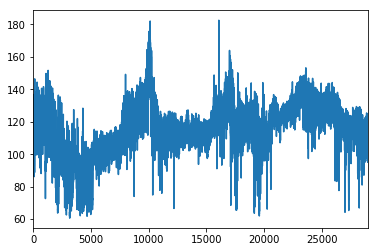

In [0]:
from matplotlib import pyplot
from sklearn.model_selection import train_test_split

data = data_consumo[['date_timestamp', 'PVPC_DEF']]

train, test = train_test_split(data, test_size=0.05, random_state=0, shuffle=False)
train_short, test_short = train_test_split(data, test_size=0.001, random_state=0, shuffle=False)

train['PVPC_DEF'].plot()
pyplot.show()

In [0]:
print(test_short.shape)
print(train.shape)

(31, 2)
(29027, 2)



## Modelo

In [0]:
from sklearn.metrics import *
from math import sqrt

def smape_kun(y_true, y_pred):
	rmse = sqrt(mean_squared_error(y_true, y_pred))
	mape = mean_absolute_error(y_true, y_pred)
	smape = mean_squared_log_error(y_true, y_pred)
	print('RMSE: %.2f'% (rmse))
	print('MAPE: %.2f %% \nSMAPE: %.2f'% (mape,smape), "%")
    
def evaluate_model(model_func, train, test):
	history = [x for x in train]
	predictions = list()
	for i in range(len(test)):
		yhat_sequence = model_func(history)
		predictions.append(yhat_sequence)
		history.append(test[i])
	smape_kun(test, predictions)
	return score, predictions
 
def daily_persistence(history):
	return history[-24]
 
def weekly_persistence(history):
	return history[-168]
 
def week_one_year_ago_persistence(history):
	return history[-8760]


In [0]:
models = dict()
models['daily'] = daily_persistence
models['weekly'] = weekly_persistence
models['week-oya'] = week_one_year_ago_persistence

predictions = dict()

for name, func in models.items():
	print(name)
	score, prediction = evaluate_model(func, train.PVPC_DEF.values.tolist(), test.PVPC_DEF.values.tolist())
	predictions[name] = prediction

daily
RMSE: 5.67
MAPE: 4.20 % 
SMAPE: 0.00 %
weekly
RMSE: 7.54
MAPE: 5.81 % 
SMAPE: 0.00 %
week-oya
RMSE: 15.01
MAPE: 13.07 % 
SMAPE: 0.02 %


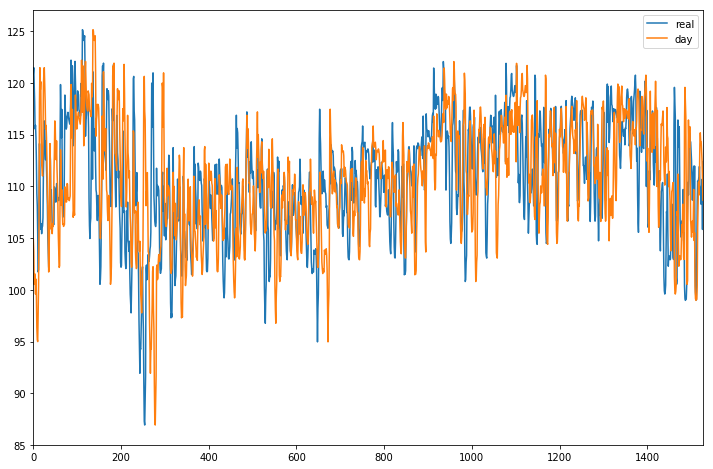

In [0]:
d = {'real':test.PVPC_DEF.values.tolist(),'day':predictions['daily']}
df = pd.DataFrame(d)
df.plot(figsize=(12, 8)) 

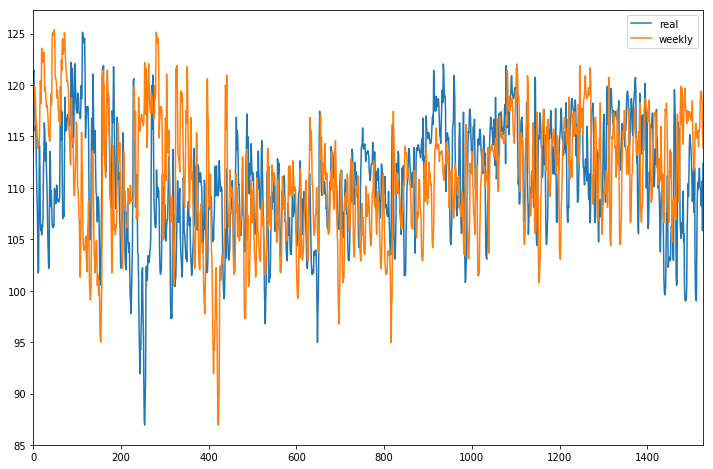

In [0]:
d = {'real':test.PVPC_DEF.values.tolist(),'weekly':predictions['weekly']}
df = pd.DataFrame(d)
df.plot(figsize=(12, 8)) 

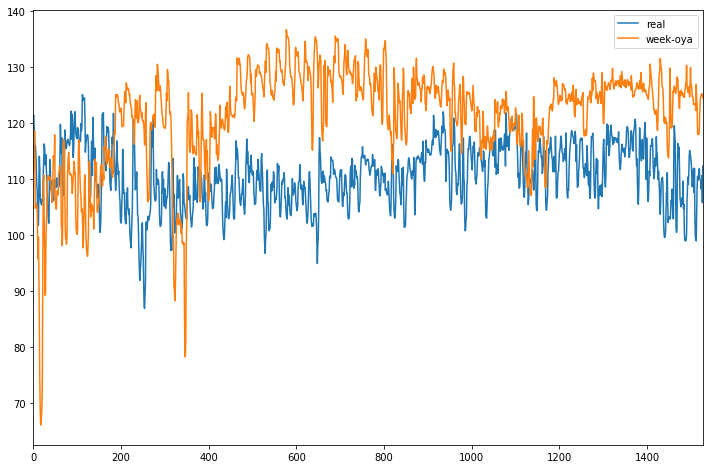

In [0]:
d = {'real':test.PVPC_DEF.values.tolist(),'week-oya':predictions['week-oya']}
df = pd.DataFrame(d)
df.plot(figsize=(12, 8)) 